In [39]:
from matplotlib.figure import Figure
#import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

#setting figuresize
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=25,15

#for normalizing data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

#read the file 
df = pd.read_csv('NSE-TATAGLOBAL11.csv')

#print the head
df.head(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [40]:
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df.Date
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-10-08,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


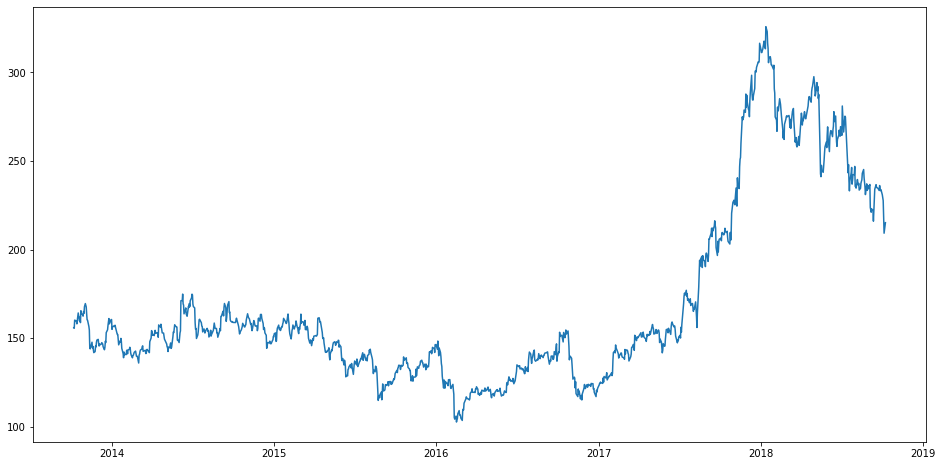

In [41]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df.Close, label='CLose Price History')
plt.show()

In [42]:

data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

for i in range(0,len(data)):
  new_data['Date'][i]=data['Date'][i]
  new_data['Close'][i] = data['Close'][i]

In [43]:
#create features
from fastai.tabular.core import add_datepart
add_datepart(new_data, 'Date')

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,155.8,2013,10,41,8,1,281,False,False,False,False,False,False,1.381190e+09
1,155.55,2013,10,41,9,2,282,False,False,False,False,False,False,1.381277e+09
2,160.15,2013,10,41,10,3,283,False,False,False,False,False,False,1.381363e+09
3,160.05,2013,10,41,11,4,284,False,False,False,False,False,False,1.381450e+09
4,159.45,2013,10,42,14,0,287,False,False,False,False,False,False,1.381709e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,230.9,2018,10,40,1,0,274,False,True,False,True,False,False,1.538352e+09
1231,227.6,2018,10,40,3,2,276,False,False,False,False,False,False,1.538525e+09
1232,218.2,2018,10,40,4,3,277,False,False,False,False,False,False,1.538611e+09
1233,209.2,2018,10,40,5,4,278,False,False,False,False,False,False,1.538698e+09


In [44]:
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,155.8,2013,10,41,8,1,281,False,False,False,False,False,False,1.381190e+09
1,155.55,2013,10,41,9,2,282,False,False,False,False,False,False,1.381277e+09
2,160.15,2013,10,41,10,3,283,False,False,False,False,False,False,1.381363e+09
3,160.05,2013,10,41,11,4,284,False,False,False,False,False,False,1.381450e+09
4,159.45,2013,10,42,14,0,287,False,False,False,False,False,False,1.381709e+09


In [45]:
new_data.drop('Elapsed', axis=1, inplace=True)

In [46]:
def mon_fri(val):
  if val==0 or val==4:
    return int(1)
  else:
    return int(0)

In [47]:
new_data['MonorFri']=10
new_data['MonorFri'] = new_data.Dayofweek.apply(lambda x: mon_fri(x))
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,MonorFri
0,155.8,2013,10,41,8,1,281,False,False,False,False,False,False,0
1,155.55,2013,10,41,9,2,282,False,False,False,False,False,False,0
2,160.15,2013,10,41,10,3,283,False,False,False,False,False,False,0
3,160.05,2013,10,41,11,4,284,False,False,False,False,False,False,1
4,159.45,2013,10,42,14,0,287,False,False,False,False,False,False,1


In [48]:
#split into train and validation set 
train = new_data[:987]
valid = new_data[987:]

In [49]:
train.head(1)

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,MonorFri
0,155.8,2013,10,41,8,1,281,False,False,False,False,False,False,0


In [50]:
x_train = train.drop(['Close'], axis=1)
y_train = train.Close

x_valid = valid.drop('Close', axis=1)
y_valid = valid.Close

In [51]:
#implementing linear regression 
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()
linearregression.fit(x_train,y_train)

LinearRegression()

In [52]:
#prediction and rmse
predictions = linearregression.predict(x_valid)
rms = np.sqrt(np.mean(np.power(np.array(y_valid) - np.array(predictions), 2)))

In [53]:
rms

121.16291596522808

In [54]:
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_valid, predictions))
rms

121.16291596522812

In [55]:
pd.options.mode.chained_assignment = None  # default='warn'

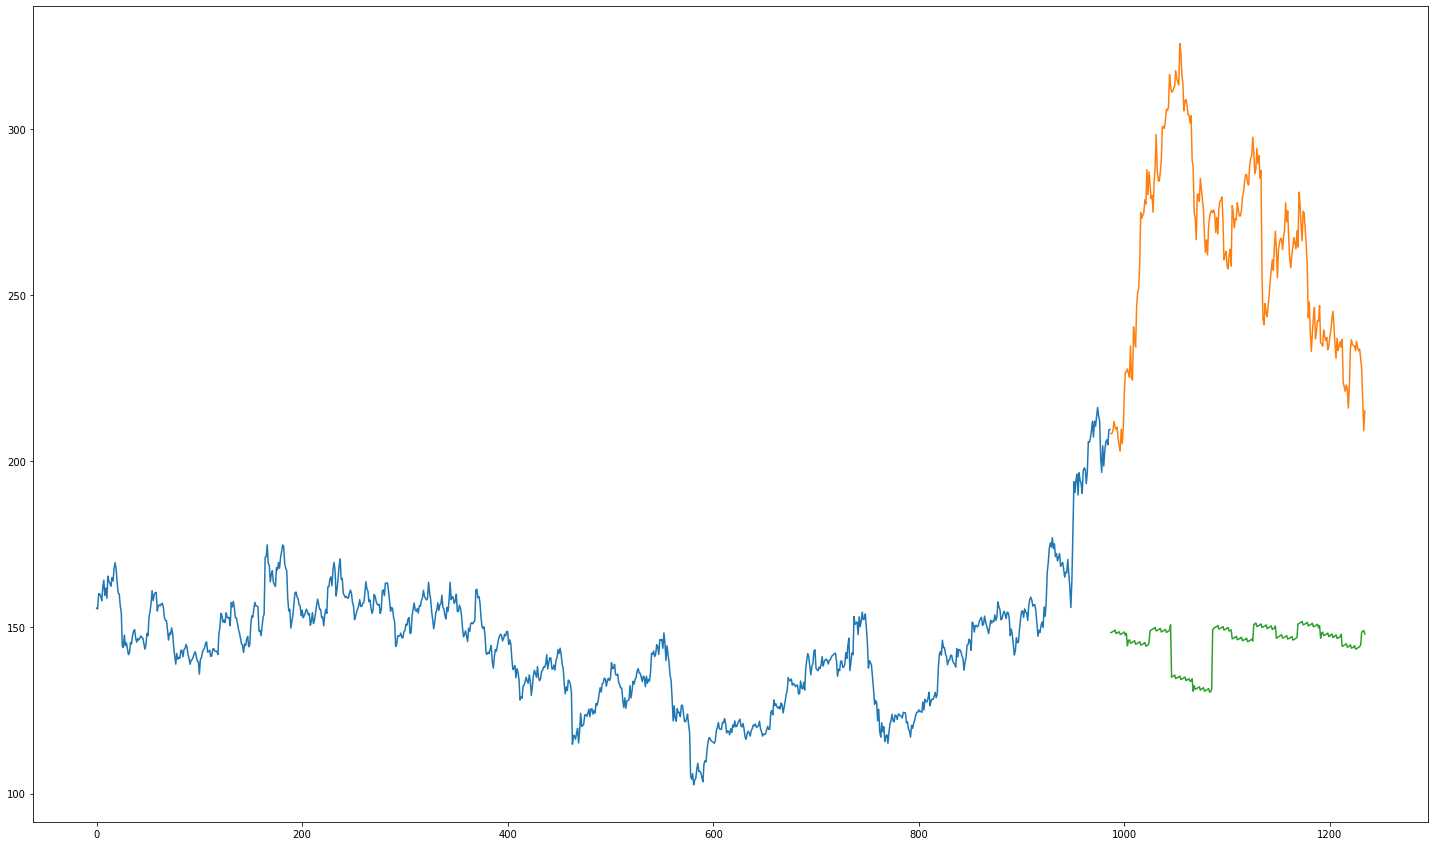

In [56]:
#plot 
valid['prediction'] = predictions

valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'prediction']])


In [57]:
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
Scaler = MinMaxScaler(feature_range=(0, 1))

In [58]:
#scaling data
x_trained_scaled = Scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_trained_scaled)
x_valid_scaled = Scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearchcv to find the best parameters 
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

model.fit(x_train, y_train)
pred = model.predict(x_valid)

#results
rms = np.sqrt(mean_squared_error(y_valid, pred))
rms

115.17086550026723

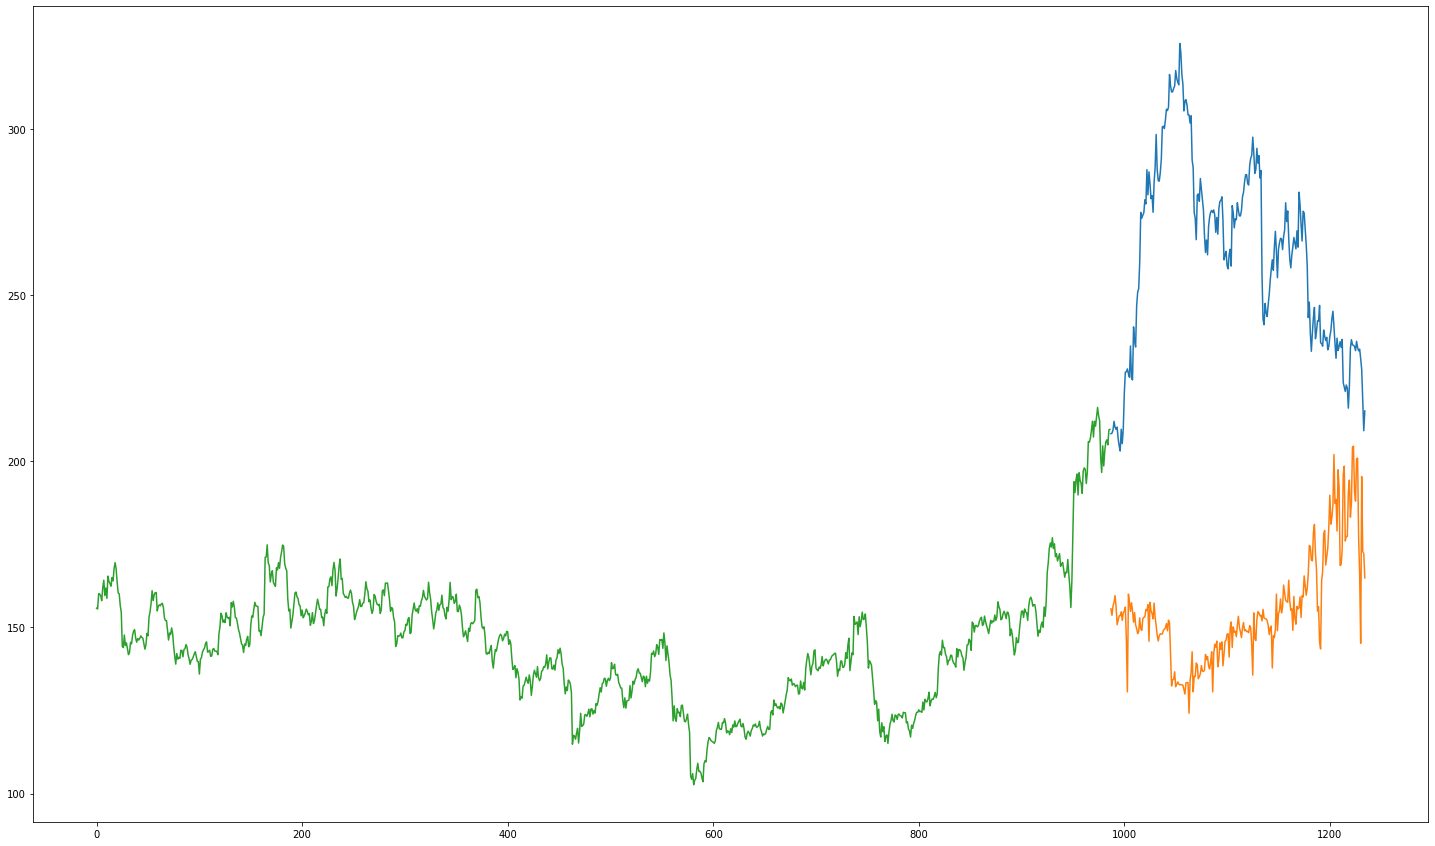

In [60]:
#plot
valid['prediction'] = pred
plt.plot(valid[['Close', 'prediction']])
plt.plot(train.Close)

In [34]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.3 MB/s 
     |████████████████████████████████| 9.8 MB 32.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [35]:
from pmdarima.arima import auto_arima

In [62]:
data = df.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, D=1, 
                   trace=True, error_action='ignore', supress_warning=True)

model.fit(training)

forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast, index=valid.index, columns=['Prediction'])
forecast

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=7.38 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5477.259, Time=0.14 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5168.276, Time=0.95 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.23 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5479.164, Time=0.17 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5076.280, Time=1.53 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.27 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.84 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5074.398, Time=0.77 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5166.277, Time=0.33 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=5.18 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.25 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5076.285, Time=1.14 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5077.935, Time=2.40 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=5076.3

,Prediction
Date,
2017-10-09,212.067644
2017-10-10,211.893666
2017-10-11,213.446288
2017-10-12,212.614440
2017-10-13,213.373743
...,...
2018-10-01,334.478578
2018-10-03,337.823619
2018-10-04,336.723095


In [63]:
rms = np.sqrt(mean_squared_error(valid.Close, forecast.Prediction))
rms

54.54322744872866

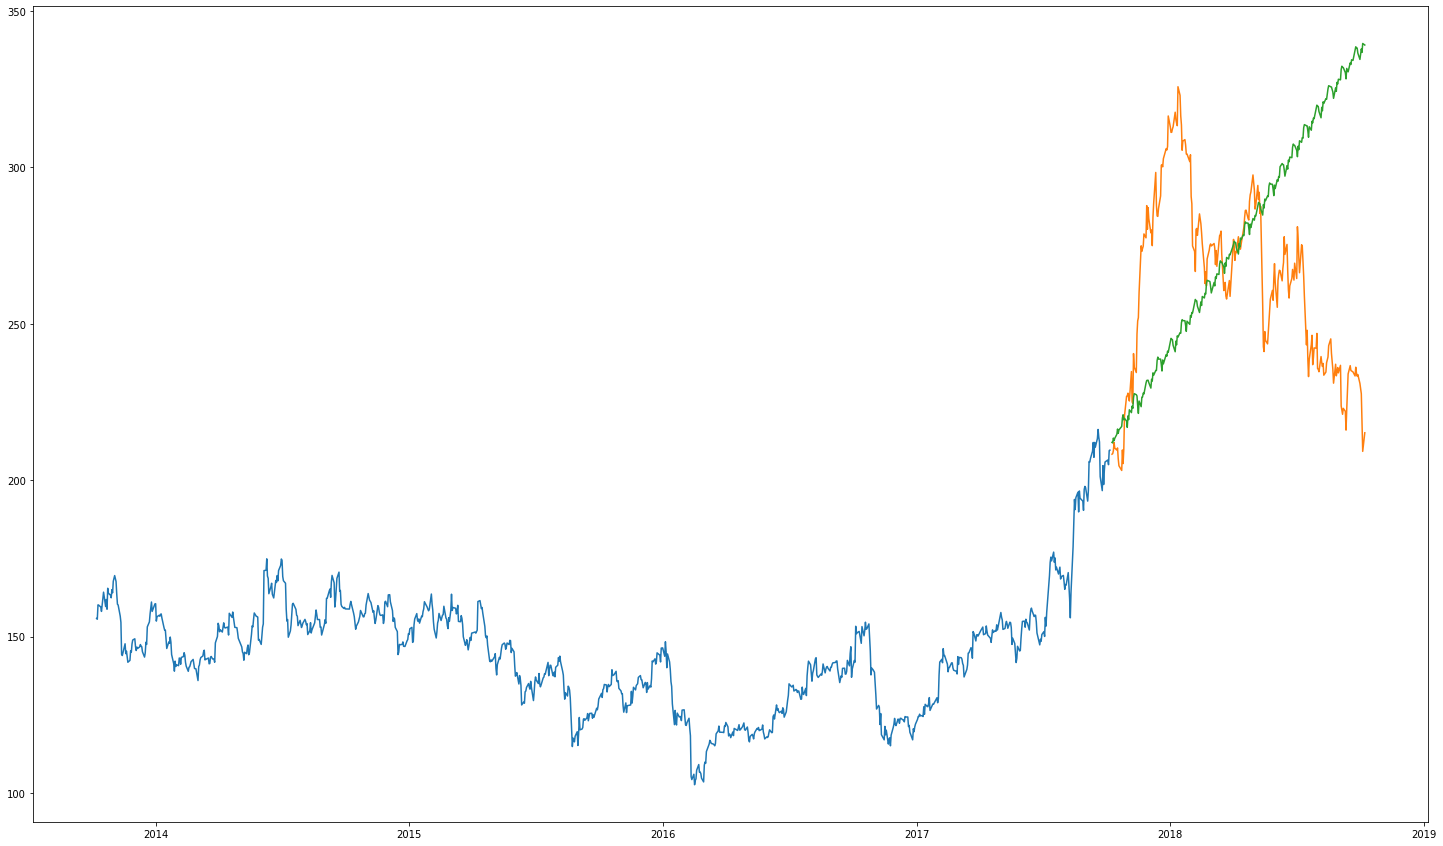

In [64]:
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])

In [65]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
from fbprophet import Prophet

new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

for i in range(0, len(data)):
  new_data['Date'][i] = data['Date'][i]
  new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date, format='%Y-%m-%d')
new_data.index = new_data['Date']

new_data.columns = ['ds', 'y']

train = new_data[:987]
valid = new_data[987:]

model = Prophet()
model.fit(train)

close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [68]:
forecast_valid = forecast['yhat'][987:]
rms = np.sqrt(mean_squared_error(valid.y, forecast_valid))
rms

57.315152137541254

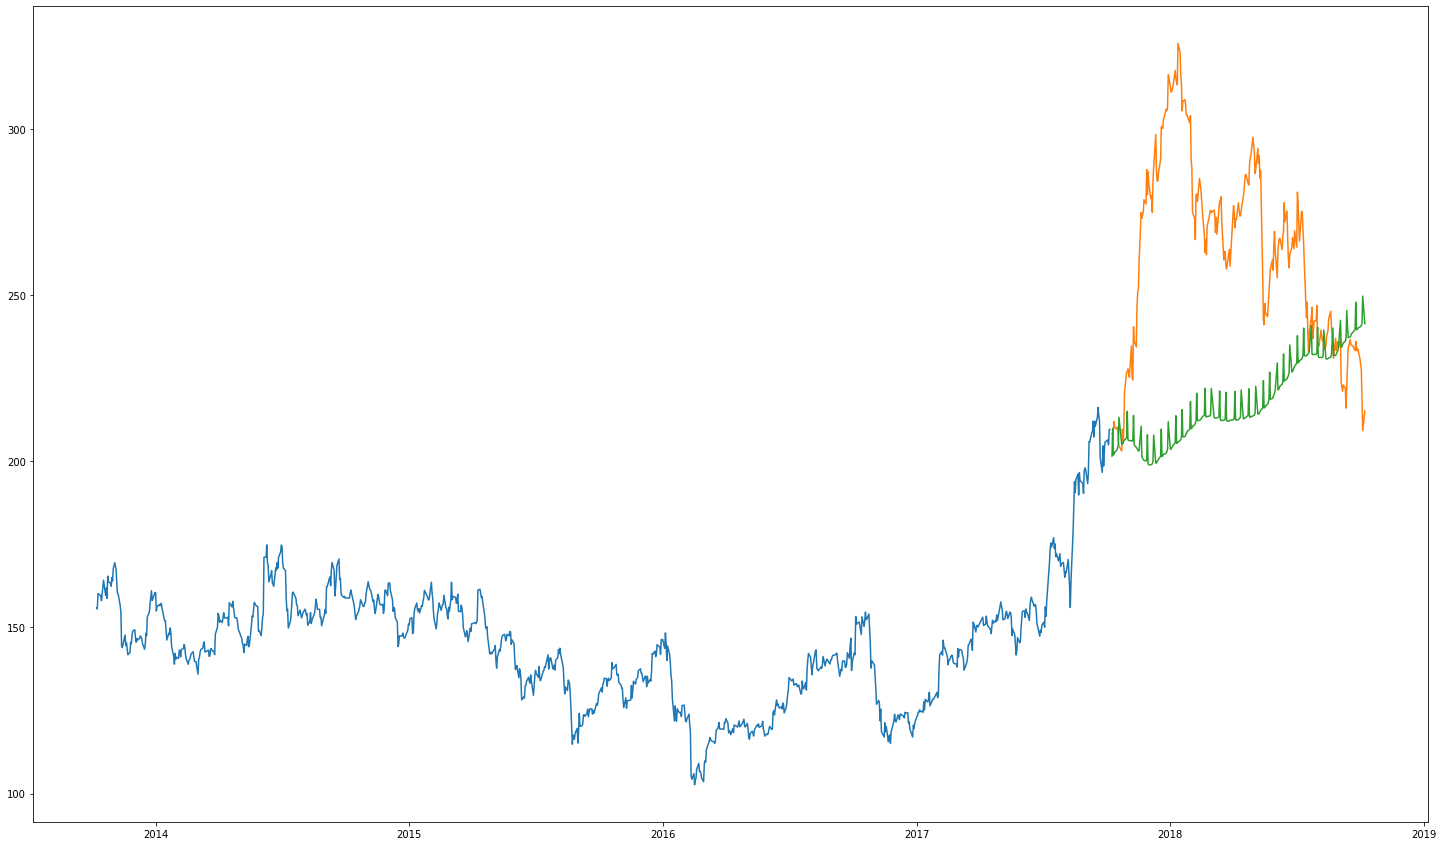

In [69]:
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])

In [73]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dropout, Dense, LSTM

data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])

for i in range(0,len(data)):
  new_data['Close'][i] = data['Close'][i]
  new_data['Date'][i] = data['Date'][i]

new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

dataset = new_data.values
train = dataset[0:987, :]
valid = dataset[987:, :]

#converting dataset to x_train and y_train
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


927/927 - 31s - loss: 0.0011 - 31s/epoch - 34ms/step


In [74]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

10.014361933969436

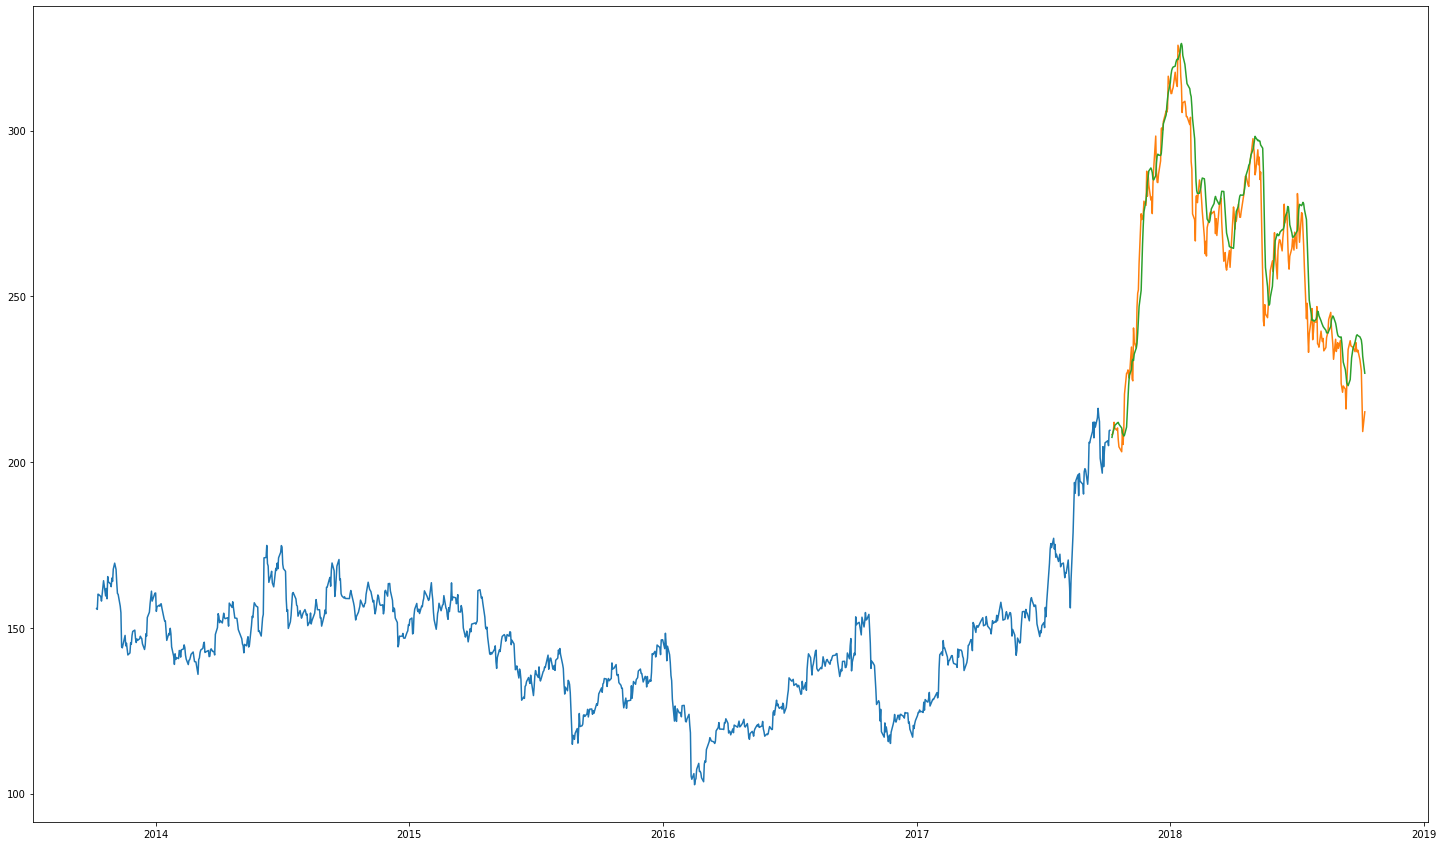

In [75]:
#plot
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])